In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
  
# Load the data
dataset = pd.read_csv("C:\\Users\\krishna\\OneDrive\\Desktop\\Krishna_thesis\\final work\\last final feature matrix.csv")
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.11, random_state = 42)
  
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',#reg:linear#SQUAREDERROR
                  n_estimators = 1500,learning_rate=0.09,max_depth=6, seed = 42,subsample=0.7)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[20:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.304835


In [2]:
#for testing dataset 'C:\\Users\\Krishna Baghel\\Desktop\\vv\\yt_f_mos1_processing_regr.csv'

In [3]:
dataset.head()

,avg_ti,avg_si,max_si,max_ti,min_si,min_ti,std_si,std_ti,blur_avg,blur_min,blur_max,blur_std,bitrate,width,height,MSCN_mean,MSCN_std,train__mos
0,40.795,60.386,93.294,53.156,33.686,28.947,14.221,4.622,14.394080,4.070789,69.011503,11.760994,101870043,720,1280,1.293989,0.406865,4.6552
1,40.727,60.085,93.157,53.104,33.331,28.889,14.214,4.624,13.991863,3.948163,68.988884,11.085990,12541643,720,1280,1.295524,0.402185,4.3793
2,40.630,59.600,93.082,53.035,32.815,28.802,14.232,4.622,13.414089,3.731166,67.451359,10.648622,6876293,720,1280,1.294845,0.404287,4.5172
3,40.434,58.518,92.741,52.846,32.120,28.703,14.198,4.613,12.510922,3.503390,63.624180,10.022086,3654494,720,1280,1.295742,0.401513,4.1034
4,39.999,56.558,91.830,52.525,31.027,28.507,14.025,4.586,11.186051,3.238184,54.358755,8.876915,1915182,720,1280,1.295060,0.403683,3.4828


In [4]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred)

0.09292422196400832

In [5]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred)

0.2021490417446753

In [6]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(test_y, pred))

MAE 0.2021490417446753


In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred)
print(r2)

0.9409379530611879


In [8]:
import pandas as pd
from scipy.stats import pearsonr
corr,_=pearsonr(test_y, pred)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.970


In [9]:
import scipy.stats
def spearmans_rank_correlation(x, y):
     
    # Calculate the rank of x's
    xranks = pd.Series(x).rank()
    print("Rankings of X:")
    print(xranks)
     
    # Calculate the ranking of the y's
    yranks = pd.Series(y).rank()
    print("Rankings of Y:")
    print(yranks)
     
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    print("Spearman's Rank correlation:",scipy.stats.pearsonr(xranks, yranks)[0])
 
# Call the function
spearmans_rank_correlation(test_y, pred)

Rankings of X:
4899    346.5
2531    317.0
6652    223.0
1287    785.5
2540    278.0
        ...  
4775    497.0
6604    232.0
1038    163.0
1860    300.0
5019    327.0
Name: train__mos, Length: 792, dtype: float64
Rankings of Y:
0      375.0
1      435.0
2      286.0
3      728.0
4      313.0
       ...  
787    542.0
788    259.0
789     71.0
790    268.0
791    363.0
Length: 792, dtype: float64
Spearman's Rank correlation: 0.9548687486324728


In [10]:
from scipy.stats import kendalltau
corr, _ = kendalltau(test_y, pred)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.81866


In [11]:
import math
MSE = np.square(np.subtract(test_y,pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.3048347453359088


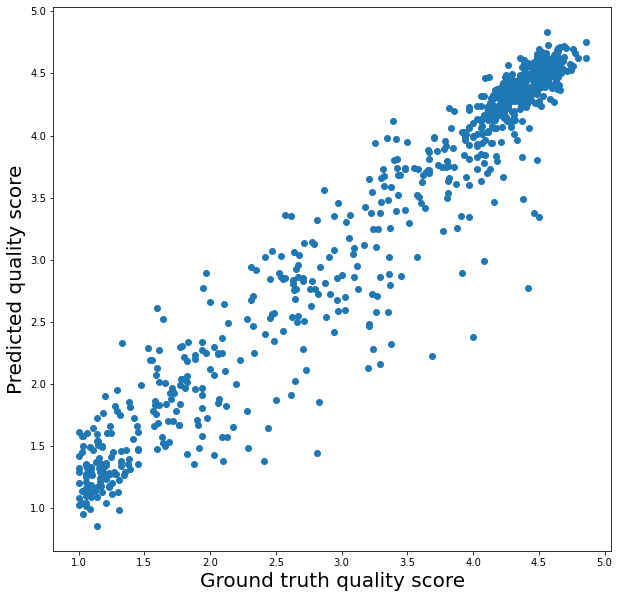

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(test_y, pred)
#plt.title("title")
plt.xlabel("Ground truth quality score", fontsize = 20)
plt.ylabel("Predicted quality score", fontsize = 20)
#plt.title("Scatter Plot of UGCVQA ",fontsize=25)
#plt.scatter(x,y,s=400)
#plt.scatter(scattersize=(100,100))
plt.show()
#plt.savefig('Spa.png')

In [18]:
plt.savefig('ScatterPlot_06.png')

<Figure size 432x288 with 0 Axes>

In [12]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

now = datetime.datetime.now()

# # Load the data
# train = pd.read_csv('../input/train.csv')
# test = pd.read_csv('../input/test.csv')
# macro = pd.read_csv('../input/macro.csv')
# id_test = test.id
# train.sample(3)

# y_train_full = train['price_doc']
# x_train_full = train.drop(["id", "timestamp", "price_doc"], axis=1)

# x_test = test.drop(["id", "timestamp"], axis=1)

# # Convert columns that are not numeric to a numeric value
# for c in x_train_full.columns:
#     if x_train_full[c].dtype == 'object':
#         lbl = preprocessing.LabelEncoder()
#         lbl.fit(list(x_train_full[c].values))
#         x_train_full[c] = lbl.transform(list(x_train_full[c].values))
#         # x_train_full.drop(c,axis=1,inplace=True)

# for c in x_test.columns:
#     if x_test[c].dtype == 'object':
#         lbl = preprocessing.LabelEncoder()
#         lbl.fit(list(x_test[c].values))
#         x_test[c] = lbl.transform(list(x_test[c].values))
#         # x_test.drop(c,axis=1,inplace=True)

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','squarederror'],
              'learning_rate': [.03,0.04, 0.05,0.07,0.09,0.1], #so called `eta` value
              'max_depth': [5, 6, 7,8],
              'min_child_weight': [2,3,4,5],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,10,50,100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_X,
         train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 768 candidates, totalling 1536 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    2.6s


KeyboardInterrupt: 